# Modern Data Science 
**(Module 01: A Touch of Data Science)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---


# Session G - Designing a Machine Learning System


---

**The purpose of this session is to demonstrate:**

1. A typical sequence of steps in designing a machine learning algorithm
2. How to implement these steps using open scikit-learn Python package

** References and additional reading and resources**
- [An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting)

---

 ## <span style="color:#0b486b">1. Steps to a Build Machine Learning Model</span>

All machine learning applications start with data. As a data scientist, a major part of your daily work is to look at the data and draw insights from them. Machine learning algorithms are the underlying tools and methods for you to draw such insights. In fact, beyond just being tools, *they provide us a framework to think, generate new ideas and new data products*. As we progress along this course, I hope you will start to build up such intuition.

One of the most important forms of these "insights" is the prediction power from the data. The rest of this tutorial will step you through a typical setting of building such a ML-based prediction model. 

Our problem is **face recognition**. Our problem can simply be reduced to two sequential steps:
1. We are provided with a collection of images, containing **40** different individuals. There are **10**  images for each individual. From this dataset, build a predictive model.
2. When a **new (unseen)** image is presented to the system, **recognize** the individual in this image.

Face-based identification systems are now being used around the world, most popularly at airports. When applying for a passport, photo of the applicant is taken. We can relate to this as step (1) where the system collects a database of face images to build the prediction model; and the authentication step at the airport is step (2). 

<img src="https://raw.githubusercontent.com/tuliplab/mds/master/Jupyter/image/m01gf1.jpg" width="400">


***However, a fixed and predefined dataset is all a data scientist has in advance, so how can we evaluate if our predictive model will perform well after it has been deployed, since we don't have access to unseen images/photos that the system will capture in the future? ***

This scenario is encountered in most of the machine learning problems and this is one of the reasons that make modern data scientists different from traditional statistician's jobs.

To address this, a ML practitioner  will typically (randomly) split the given dataset $D$ into, what's called, the **training** dataset and **testing** dataset. We then use the training dataset to build the model, and then use the testing dataset, **as if the system has never seen it before**, to test how well the system will perform.

This line of logics naturally tells us three essential steps to build a machine learning pipeline:

* **Step 1**. **Preparing your dataset in the form that is applicable to apply a machine leaning model** such as logistic regression, decision tree classifier and so forth. This usually also means that one might need to do necessary pre-processing steps (e.g., data cleaning) and then split the data into *training* and *testing* datasets.
* **Step 2**. **Select a suitable or a set of suitable machine learning models** for your problem at hand and train them using the **training dataset**. This step requires a deep understanding of machine learning models available to you, when it works and it doesn't work, what input is expected, what are its pitfalls, how to interpret its outputs and so on.
* **Step 3**. **Evaluate the performance of model** using the **testing dataset**.

This only presents the most essential steps. In practice, we usually repeat these steps several times and have several additional substeps such as: formulating sensible features (**feature extraction**), selecting important features (**feature selection**), selecting optimal model or parameters (**model selection**).

---
### <span style="color:#0b486b">Step 1. Preparing your dataset: pre-processing, training and testing datasets</span>
To build a predictive model, a typical setting is to split the dataset into training and testing dataset.

In [ ]:
!pip install -U scikit-learn

**<span style="color:blue"> 1.1 First, we load the dataset using scikit-learn </span>**

In [1]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics


/gpfs/fs01/user/s05b-0294eb3de63d2e-b5498f932ea5/.local/lib/python2.7/site-packages/matplotlib/style/core.py:203: UserWarning: In /gpfs/fs01/user/s05b-0294eb3de63d2e-b5498f932ea5/.config/matplotlib/stylelib/my_custom_style.mplstyle: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(message)


In [2]:
# When these datasets are loaded, they aren't loaded as NumPy arrays. They are of type Bunch. 
# A Bunch is a common data structure in Python. It's essentially a dictionary with the keys added to the object as attributes.

faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /gpfs/fs01/user/s05b-0294eb3de63d2e-b5498f932ea5/scikit_learn_data


In [4]:
print(faces.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [5]:
print(faces.keys())

['images', 'data', 'target', 'DESCR']


In [6]:
# this function is a utility to face images from the dataset
def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(25,25))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        #p.text(0, 14, str(label[i]), color='red', fontsize=18)
        #p.text(0, 60, str(i))
    fig.show()

/gpfs/fs01/user/s05b-0294eb3de63d2e-b5498f932ea5/.local/lib/python2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


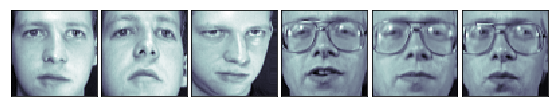

In [7]:
# display the first 20 images
display_faces(faces.images[7:20], faces.target[7:20], 6)


In [8]:
# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

In [9]:
# number of class labels
n_classes = len(np.unique(y))
print(n_classes)

40


**<span style="color:blue"> 1.2 Next, we perform a pre-processing step to transform feature.</span>** In this case we use **principal component analysis (PCA)** to perform a **dimenentionality reduction** step, which is extremely useful when dealing with high-dimentional data as typically encountered in modern data science problem.

<img src="https://raw.githubusercontent.com/tuliplab/mds/master/Jupyter/image/note.gif" width="50", align="left"></img> *If you are unfamiliar with PCA, it is highly recommended that you should learn and know how to apply it to your tasks. PCA involves *singular value decomposition* technique from linear algebra, which might appears somewhat complicated. From a practical point of view, it is sufficient to know that it can be used to reduce continuous-valued feature vectors in high-dimensional space to low-dimensional spaces. You can find an explanation for PCA in almost any data analysis, machine learning or AI text books. Its wikipedia entry can be found [here](https://en.wikipedia.org/wiki/Principal_component_analysis).**

In [10]:
# this steps further pre-process the features by performing a dimentionality reduction step via PCA.
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
print(pca)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [11]:
pca_X = pca.fit_transform(X)

In [12]:
pca.explained_variance_ratio_

array([0.23812722, 0.13993962, 0.07968614, 0.0499833 , 0.03609844,
       0.03156938, 0.0242683 , 0.02036395, 0.01958113, 0.01672119],
      dtype=float32)

**<span style="color:blue"> 1.3 Next, since our problem is a prediction problem, a typical setup is to split the whole dataset into **training** and **testing** sets.</span>**.

With sciki-learn, we can do this step using [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [`StratifiedShuffleSplit`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html).

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_X, test_X, train_y, test_y = train_test_split(pca_X, y, test_size = 0.3, random_state=2)

In [15]:
print("Number of training samples:\t" + str(len(train_X)))
print("Number of testing samples:\t" + str(len(test_X)))

Number of training samples:	280
Number of testing samples:	120


---
### <span style="color:#0b486b">Step 2. Choose one or more suitable machine learing models for your task.</span>

At this step, we need to select a suitable or a set of suitable machine learning models for your problem at hand and train them using the **training dataset**. 

<img src="https://raw.githubusercontent.com/tuliplab/mds/master/Jupyter/image/note.gif", width="40", align="left">This step requires deep understanding of machine learning models avaiable to you, when it works and it doesn't work, what input is expected, what are its pitfalls, how to intepret its outputs and so on. This [**scikit-learn cheat sheet**](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), for example, is a great place to start.

In this tutorial, we will *logisticRegression* implemented in scikit-learn as the prediction model. Its description can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

**<span style="color:blue">2.1 Choose a sensible prediction model.</span>**

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# create a logistic regression
logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

**<span style="color:blue">2.2 Now we train the model using *training dataset*.</span>**

In [18]:
# train model
train_model = logistic.fit(train_X, train_y)

In [19]:
print(train_model.coef_)

[[-2.49665621e-01  9.32167164e-02  1.05829590e-01  5.84199814e-01
   5.64051179e-01 -3.60834835e-01 -3.63815195e-02 -1.52341240e+00
  -7.59316731e-02  3.65813519e-01]
 [-7.51003190e-02 -1.59383961e-01 -4.50423685e-01 -1.48419578e-01
   3.57781486e-01 -2.63365999e-01 -8.41852832e-01 -7.22347723e-01
  -7.02100620e-01  5.13060796e-02]
 [ 0.00000000e+00  0.00000000e+00  3.93366035e-01 -1.64606501e-01
   9.22647325e-03 -7.80100383e-02 -4.09926933e-01  1.00481676e+00
   2.00603194e-01 -1.24250444e+00]
 [-1.15522150e-01 -1.52345361e-01  0.00000000e+00  0.00000000e+00
   1.77360750e-01  2.08460908e-01 -8.77808641e-01  2.37293430e-01
   0.00000000e+00  3.75207639e-02]
 [-9.42698940e-02  2.73035353e-01  2.84159021e-01  1.29788134e-01
  -9.70119821e-01 -2.97233225e-01  1.34155728e-01 -3.57392014e-01
  -4.34004193e-01 -5.02689976e-01]
 [-5.12317304e-01 -4.37202402e-02  0.00000000e+00  3.08636386e-01
  -8.40943016e-01 -2.38949450e-01 -7.98512464e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00

---
### <span style="color:#0b486b">Step 3. Assessing the model performance using *testing dataset*.</span>

**<span style="color:blue">3.1 Use the trained model to predict newly unseen data samples in the testing datasets.</span>**

In [20]:
# perform prediction on the newly, unseen, test data.
pred_results = train_model.decision_function(test_X)

In [21]:
# examine what was returned
print(pred_results)

[[-5.96928478 -9.13799615 -3.43676479 ... -3.96055402 -8.04472766
  -0.51804359]
 [-6.97155654 -4.53516465 -4.39553808 ... -5.03508778 -9.5872759
  -4.01920592]
 [-6.03598462 -8.11286852 -6.63715805 ... -6.99397392 -5.82736366
  -7.59411752]
 ...
 [-6.06468391 -7.88942674 -2.01288007 ... -1.1656636  -5.93014398
  -6.19028127]
 [-5.29021374 -6.50861518 -2.79688911 ... -2.66894458 -8.0099526
  -4.60202764]
 [-2.32185723  0.79443062 -8.32238169 ... -6.60071499 -9.95644691
  -6.28890317]]


In [22]:
# LogisticRegression model implemeted in scikit-learn package employs a one-versus all strategy 
# for multilabel classification problem returns a array of log-likelihood prediction for each label
# Here, we need to use the argmax function to return the most likely predictive label.
pred_labels = [np.argmax(pred_results[i]) for i in range(len(pred_results))]

In [23]:
# print the first few predicted labels to gain a sense of how the model is performing
print(pred_labels[0:10])

[9, 4, 22, 23, 35, 2, 6, 18, 30, 8]


In [24]:
# print the first few prediction against the true labels
for i in range(10):
    print(str(test_y[i]) + " predicted as " + str(pred_labels[i]))

9 predicted as 9
3 predicted as 4
22 predicted as 22
15 predicted as 23
35 predicted as 35
2 predicted as 2
6 predicted as 6
18 predicted as 18
30 predicted as 30
22 predicted as 8


**<span style="color:blue">3.2 Generate a report against model assessment and performances metrics.</span>**
The performance metrics can be different depending on the task at hand. Typically, it falls into either a **classification** or **regression** problems. 

Our current is face recognition, hence it is a classification problem. To assess the performance of a classification problem, important metrics include: **precision**, **recall**, and **F-score** which can be derived from the **confusion_matrix**.

Scikit-learn has provided several pre-implementated modules to compute these metrics, which can be founded [here](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

In [25]:
# print out the confusion matrix
print(metrics.confusion_matrix(pred_labels, test_y))

[[2 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [26]:
# print out the classification report
target_names=["person " + str(i) for i in range(len(np.unique(y)))]
print(metrics.classification_report(pred_labels, test_y, target_names=target_names))

             precision    recall  f1-score   support

   person 0       0.67      1.00      0.80         2
   person 1       1.00      1.00      1.00         4
   person 2       0.60      1.00      0.75         3
   person 3       0.33      0.50      0.40         2
   person 4       0.00      0.00      0.00         1
   person 5       1.00      1.00      1.00         2
   person 6       0.40      0.67      0.50         3
   person 7       1.00      1.00      1.00         2
   person 8       1.00      0.50      0.67         2
   person 9       0.50      0.33      0.40         3
  person 10       1.00      0.60      0.75         5
  person 11       1.00      1.00      1.00         2
  person 12       0.50      0.33      0.40         3
  person 13       1.00      1.00      1.00         1
  person 14       1.00      1.00      1.00         4
  person 15       0.67      0.67      0.67         3
  person 16       1.00      1.00      1.00         2
  person 17       1.00      1.00      1.00   

/gpfs/fs01/user/s05b-0294eb3de63d2e-b5498f932ea5/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 39, does not match size of target_names, 40
  .format(len(labels), len(target_names))


## <span style="color:#0b486b">2. Summary </span>
Up to now, you should understand the general principle as well concrete steps to build a typical machine learning model. Given a training dataset, these main steps can be summarized as follows:

* **<span style="color:#0b486b"> Step 1. Preparing your dataset: pre-processing, training and testing datasets</span>**
    * 1.1 load the dataset
    * 1.2 perform necessary feature pro-processing steps.
    * 1.3 construct the training and testing sets. A typical spliting proportion is 70% for training and 30% for testing.
* **<span style="color:#0b486b">Step 2. Choose a suitable machine learning model for your problem at hand.</span>**
    * 2.1 Pick a sensible model and initialize it
    * 2.2 Train this model using **training** set
* **<span style="color:#0b486b">Step 3. Assess the performance of your modelling choice using **testing** dataset.</span>**
    * 3.1 Use trained model to predict newly and unseen data samples from **testing** dataset.
    * 3.2 Produce a performance report against model assessment metrics depending on which type of machine learning problems you are working with (e.g., classification or regression).

## <span style="color:#0b486b">3. Put It All Together</span>
Follow the summary above and put all above code segments together we end up the following piece of codes for our face detection problem.

<img src="https://raw.githubusercontent.com/tuliplab/mds/master/Jupyter/image/note.gif" width="40", align="left"></img>*Before proceeding to execute the following codes, you might want to start from everything from scatch. One way to do this is to **restart the kernel** by **pressing the digit '0' twice** from your keyboard.*

In [ ]:
# this function is a utility to face images from the dataset
def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# load face datasets
faces = datasets.fetch_olivetti_faces()

# display the first 20 images
display_faces(faces.images, faces.target, 20)

# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

# number of class labels
n_classes = len(np.unique(y))

# this steps further pre-process the features by performing a dimentionality reduction step via PCA.
pca = decomposition.PCA(n_components=10)
pca_X = pca.fit_transform(X)

# split into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(pca_X, y, test_size = 0.3, random_state=2)

In [ ]:
# create a logistic regression
logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

# train model
train_model = logistic.fit(train_X, train_y)

# perform prediction on the newly, unseen, test data.
pred_results = train_model.decision_function(test_X)

# LogisticRegression model implemeted in scikit-learn package employs a one-versus all strategy 
# for multilabel classification problem returns a array of log-likelihood prediction for each label
# Here, we need to use the argmax function to return the most likely predictive label.
pred_labels = [np.argmax(pred_results[i]) for i in range(len(pred_results))]

# print out the classification report
target_names=["person " + str(i) for i in range(len(np.unique(y)))]
print(metrics.classification_report(pred_labels, test_y, target_names=target_names))

## <span style="color:#0b486b">4. Automate Machine Learning Pipline</span>
Scikit-learn provides a Pipeline utility to help automate machine learning pipeline which executes a linear sequence of data transformation and model fitting to be chained together. The following code summarizes and packs above steps into a machine learning pipeline for our face detection problem.

In [27]:
from sklearn import datasets
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


# load face datasets
faces = datasets.fetch_olivetti_faces()

# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

# create pipeline
estimators = []
estimators.append(('pca', decomposition.PCA(n_components=10)))
estimators.append(('logistic', LogisticRegression(penalty='l1')))
model = Pipeline(estimators)

# evaluate pipeline
kfold = StratifiedShuffleSplit(n_splits=5,test_size = 0.3) # split into training and testing sets with n_splits times.

results = cross_val_score(model, X, y, cv=kfold) # run the model with n_splits datasets and evaluate output.

print(results) # print accuracy for n_splits times of data
print(results.mean())

[0.85       0.83333333 0.83333333 0.8        0.80833333]
0.825


## <span style="color:#0b486b">5. Practical Coding Exercises</span>

1. In section C, what is the performance if we don't perform the dimensionality reduction step? Will the precision of the face recognition problem increase or decrease? Use the above codes as the template, write your own codes to demonstrate this.
2. Learning the lesson from step (1) above, vary the dimensionality in {2, 5, 10, 15, and 20} (e.g., the parameter `n_components`). Which number of components give the best results?
3. Logistic regression is not the best predictive model choice for this problem. Read the description for the Support Vector Machines (SVM) from scikit-learn [here](http://scikit-learn.org/stable/modules/svm.html). What is the performance now if the classifier is SVM instead of LogisticRegression?. 